In [1]:
library(rGADEM)
library(BSgenome.Hsapiens.UCSC.hg38)
library(GenomicRanges)
library(rtracklayer)
library(Biostrings)
library("motifStack")  # for PWM similarity
library("seqLogo")
library(universalmotif)
# library(MotiV)

Loading required package: Biostrings

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors

Loading required package: stats4


Attaching package: ‘S4Vectors’


The following object is masked from ‘package:utils’:

    findMatches


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges

Loading required package: XVector

Loading req

In [2]:
list.files()

[1] "app_Genrich_DESeq2_analysis_diff_no_SVA.ipynb"                                                                             
[2] "app_Genrich_DESeq2_analysis_diff_no_SVA.r"                                                                                 
[3] "app_Genrich_DESeq2_analysis_diff_with_SVA.ipynb"                                                                           
[4] "app_Genrich_DESeq2_analysis_diff_with_SVA.r"                                                                               
[5] "extended20merged20.the.matrix.peaks_and_counts.combined_peak_DESeq2_results.downregulated_peaks.log2FC.0.5.padj.0.1..bed"  
[6] "extended20merged20.the.matrix.peaks_and_counts.combined_peak_DESeq2_results.SVA.downregulated.padj0.1_log2FC.minus.0.5.bed"
[7] "extended20merged20.the.matrix.peaks_and_counts.combined_peak_DESeq2_results.SVA.upregulated.padj0.1_log2FC.plus.0.5.bed"   
[8] "extended20merged20.the.matrix.peaks_and_counts.combined_peak_DESeq2_results.upregulated_peaks.log2FC.0.5.padj.0.1..bed"

In [3]:
down = import('extended20merged20.the.matrix.peaks_and_counts.combined_peak_DESeq2_results.downregulated_peaks.log2FC.0.5.padj.0.1..bed', format='BED')
up = import('extended20merged20.the.matrix.peaks_and_counts.combined_peak_DESeq2_results.upregulated_peaks.log2FC.0.5.padj.0.1..bed', format="BED")

length(down)
length(up)

# Print initial statistics
cat("Initial peak counts:\n")
cat("Downregulated peaks:", length(down), "\n")
cat("Upregulated peaks:", length(up), "\n")

# Remove regions that are outside valid chromosome ranges
valid_chromosomes <- paste0("chr", c(1:22, "X", "Y", "M"))

# Extract sequences with bedtools
# bedtools getfasta -fi genome.fa -bed fixed_peaks.bed -fo peaks.fa

[1] 15551

[1] 16510

Initial peak counts:
Downregulated peaks: 15551 
Upregulated peaks: 16510 


In [4]:
# Get sequences directly
down_seq <- getSeq(BSgenome.Hsapiens.UCSC.hg38, down)
up_seq <- getSeq(BSgenome.Hsapiens.UCSC.hg38, up)

# Run GADEM
gadem_down <- GADEM(down_seq, verbose=1, genome=BSgenome.Hsapiens.UCSC.hg38)
gadem_up <- GADEM(up_seq, verbose=1, genome=BSgenome.Hsapiens.UCSC.hg38)

*** Start C Programm ***
input sequence file:  
number of sequences and average length:				15551  66.7
Use pgf method to approximate llr null distribution
parameters estimated from sequences in:  

number of GA generations & population size:			5 100

PWM score p-value cutoff for binding site declaration:		2.000000e-04
ln(E-value) cutoff for motif declaration:			0.000000

number of EM steps:						40
minimal no. sites considered for a motif:			777

[a,c,g,t] frequencies in input data:				0.213486 0.286514 0.286514 0.213486
*** Running an unseeded analysis ***
GADEM cycle  1: enumerate and count k-mers... top 3  4, 5-mers: 20 40 60
Done.
Initializing GA... Done.
GADEM cycle[  1] generation[  1] number of unique motif: 6
   spacedDyad: cagannnnnnnnnnaaaa   motifConsensus: rAGrAGrAGrrrrAGrrG    0.10 fitness: -1568.37
   spacedDyad: tttcnnnnnnnnnngga    motifConsensus: CCbCCkCCkCCkCCkCC     0.20 fitness: -1077.93
   spacedDyad: ggaagngagg           motifConsensus: GrrGrrGrrG            0.20 

In [5]:
# str(gadem_down)
# str(gadem_up)

In [6]:
nOccurrences(gadem_down)
consensus(gadem_down)
cat("consensus")
consensus(gadem_down)[1]
consensus(gadem_down)[2]
consensus(gadem_down)[3]
consensus(gadem_down)[4]
consensus(gadem_down)[5]

[1] 2717 1702 1328 1370

[1] "nrrGrAGrAGrrrrAGrrGn" "CysCykCCkCCGCCkCCn"   "nAArAArAAn"          
[4] "nCwGsAGswGs"

consensus

[1] "nrrGrAGrAGrrrrAGrrGn"

[1] "CysCykCCkCCGCCkCCn"

[1] "nAArAArAAn"

[1] "nCwGsAGswGs"

[1] NA

In [7]:
nOccurrences(gadem_up)
consensus(gadem_up)
cat("consensus")
consensus(gadem_up)[1]
consensus(gadem_up)[2]
consensus(gadem_up)[3]
consensus(gadem_up)[4]
consensus(gadem_up)[5]

[1] 3332 1734 1413

[1] "rGrGrvnGrrGrwGrrGrrG" "nyCCwsCwsCy"          "nrrrrArrArrm"

consensus

[1] "rGrGrvnGrrGrwGrrGrrG"

[1] "nyCCwsCwsCy"

[1] "nrrrrArrArrm"

[1] NA

[1] NA

In [8]:
gadem_down
gadem_up

	Object of class 'gadem' 
	This object has the following slots: 
	motifs,pwm,consensus,align,name,seq,chr,start,end,strand,seqID,pos,pval,fastaHeader


	Object of class 'gadem' 
	This object has the following slots: 
	motifs,pwm,consensus,align,name,seq,chr,start,end,strand,seqID,pos,pval,fastaHeader


In [9]:
# Assuming your gadem object is called gadem_down
length(gadem_down@motifList)  # number of motifs
# str(gadem_down@motifList)
# Assuming your gadem object is called gadem_up
length(gadem_up@motifList)  # number of motifs
# str(gadem_up@motifList)

[1] 4

[1] 3

In [10]:
print("Motif Visualization")

[1] "Motif Visualization"


In [11]:
library("seqLogo")

cat("PWM in down-binding sites")
pwm_list_down <- lapply(gadem_down@motifList, function(m) m@pwm)
names(pwm_list_down) <- paste0("motif_", seq_along(pwm_list_down))
pwm_list_down

cat("PWM in up-binding sites")
pwm_list_up <- lapply(gadem_up@motifList, function(m) m@pwm)
names(pwm_list_up) <- paste0("motif_", seq_along(pwm_list_up))
pwm_list_up

PWM in down-binding sites

$motif_1
       1      2      3      4      5      6      7      8      9     10     11
A 0.2284 0.2866 0.5908 0.1621 0.3586 0.6870 0.3010 0.3531 0.6492 0.1842 0.4314
C 0.2488 0.1540 0.0060 0.0413 0.0989 0.0078 0.0266 0.0872 0.0303 0.0240 0.0185
G 0.3246 0.5489 0.2855 0.7910 0.5360 0.2440 0.6664 0.5548 0.2003 0.7770 0.5456
T 0.1982 0.0104 0.1177 0.0056 0.0064 0.0611 0.0060 0.0049 0.1202 0.0148 0.0045
      12     13     14     15     16     17     18     19     20
A 0.5239 0.3289 0.3877 0.6352 0.2088 0.3675 0.5555 0.2510 0.2394
C 0.0670 0.0846 0.0280 0.0251 0.0380 0.0997 0.0383 0.1000 0.2596
G 0.3201 0.5731 0.5820 0.2925 0.7160 0.5302 0.3344 0.6316 0.3394
T 0.0890 0.0134 0.0023 0.0471 0.0372 0.0027 0.0718 0.0174 0.1616

$motif_2
       1      2      3      4      5      6      7      8      9     10     11
A 0.0029 0.0481 0.0509 0.0064 0.1184 0.1178 0.0028 0.0492 0.0333 0.0005 0.1881
C 0.8423 0.5862 0.3969 0.8924 0.5634 0.1770 0.8537 0.7469 0.2315 0.9780 0.6203
G 0.0948 0.0999 0.4039 0.0398 0.1236 0.5218 0.1143 0.0685 0.4156 0.0064 0.0797
T 0.0600 0.2657 0.1483 0.0615 0.1946 0.1834 0.0292 0.1354 0.3195 0.0152 0.1119
      12     13     14     15     16     17     18
A 0.0656 0.0017 0.0328 0.0293 0.0005 0.0340 0.2155
C 0.1184 0.9317 0.7597 0.2378 0.9162 0.7502 0.3260
G 0.6561 0.0480 0.0427 0.4040 0.0711 0.0929 0.2990
T 0.1600 0.0187 0.1648 0.3289 0.0123 0.1229 0.1596

$motif_3
       1      2      3      4      5      6      7      8      9     10
A 0.2583 0.8631 0.9684 0.4476 0.7144 0.7798 0.5348 0.8865 0.9985 0.2674
C 0.2289 0.0005 0.0005 0.0005 0.0005 0.0005 0.0005 0.0005 0.0005 0.2090
G 0.3234 0.1359 0.0306 0.5514 0.2846 0.2192 0.4642 0.1125 0.0005 0.2918
T 0.1894 0.0005 0.0005 0.0005 0.0005 0.0005 0.0005 0.0005 0.0005 0.2317

$motif_4
       1      2      3      4      5      6      7      8      9     10     11
A 0.1732 0.0005 0.4434 0.0005 0.0005 0.6685 0.0005 0.0005 0.6059 0.0005 0.2214
C 0.3077 0.7414 0.0005 0.0005 0.3698 0.0005 0.0005 0.4645 0.0005 0.0005 0.3103
G 0.3257 0.2576 0.0005 0.9985 0.6292 0.0005 0.9985 0.5345 0.0005 0.9985 0.4678
T 0.1934 0.0005 0.5556 0.0005 0.0005 0.3305 0.0005 0.0005 0.3931 0.0005 0.0005

PWM in up-binding sites

$motif_1
       1      2      3      4      5      6      7      8      9     10     11
A 0.4171 0.1305 0.5696 0.2928 0.4072 0.3114 0.4195 0.0478 0.5570 0.3312 0.2698
C 0.0131 0.0221 0.0188 0.0670 0.0817 0.3123 0.0823 0.1395 0.0601 0.0457 0.0957
G 0.3575 0.8442 0.3980 0.6106 0.5073 0.3584 0.2299 0.8104 0.3749 0.5939 0.6175
T 0.2123 0.0032 0.0137 0.0296 0.0038 0.0179 0.2683 0.0023 0.0080 0.0293 0.0170
      12     13     14     15     16     17     18     19     20
A 0.3198 0.5651 0.0805 0.5001 0.3285 0.2761 0.3983 0.5825 0.0925
C 0.2524 0.0364 0.0319 0.0829 0.0589 0.0101 0.1473 0.0739 0.0928
G 0.4126 0.1931 0.8865 0.4099 0.4980 0.6891 0.4501 0.2206 0.7274
T 0.0152 0.2054 0.0011 0.0071 0.1146 0.0248 0.0044 0.1230 0.0874

$motif_2
       1      2      3      4      5      6      7      8      9     10     11
A 0.1675 0.0005 0.0005 0.0005 0.6382 0.0005 0.0005 0.4771 0.0005 0.0005 0.2972
C 0.3201 0.4533 0.9985 0.9985 0.0005 0.5041 0.9985 0.0005 0.4725 0.9985 0.3318
G 0.3087 0.1715 0.0005 0.0005 0.0005 0.4949 0.0005 0.0005 0.5266 0.0005 0.0005
T 0.2036 0.3748 0.0005 0.0005 0.3608 0.0005 0.0005 0.5219 0.0005 0.0005 0.3704

$motif_3
       1      2      3      4      5      6      7      8      9     10     11
A 0.1934 0.4328 0.6178 0.4836 0.3918 0.9985 0.4313 0.3784 0.9017 0.6001 0.5931
C 0.2872 0.1077 0.0005 0.0005 0.0005 0.0005 0.0005 0.0005 0.0005 0.0005 0.0005
G 0.2315 0.4590 0.3812 0.5154 0.6072 0.0005 0.5677 0.6206 0.0973 0.3989 0.4059
T 0.2879 0.0005 0.0005 0.0005 0.0005 0.0005 0.0005 0.0005 0.0005 0.0005 0.0005
      12
A 0.3787
C 0.3320
G 0.2817
T 0.0076

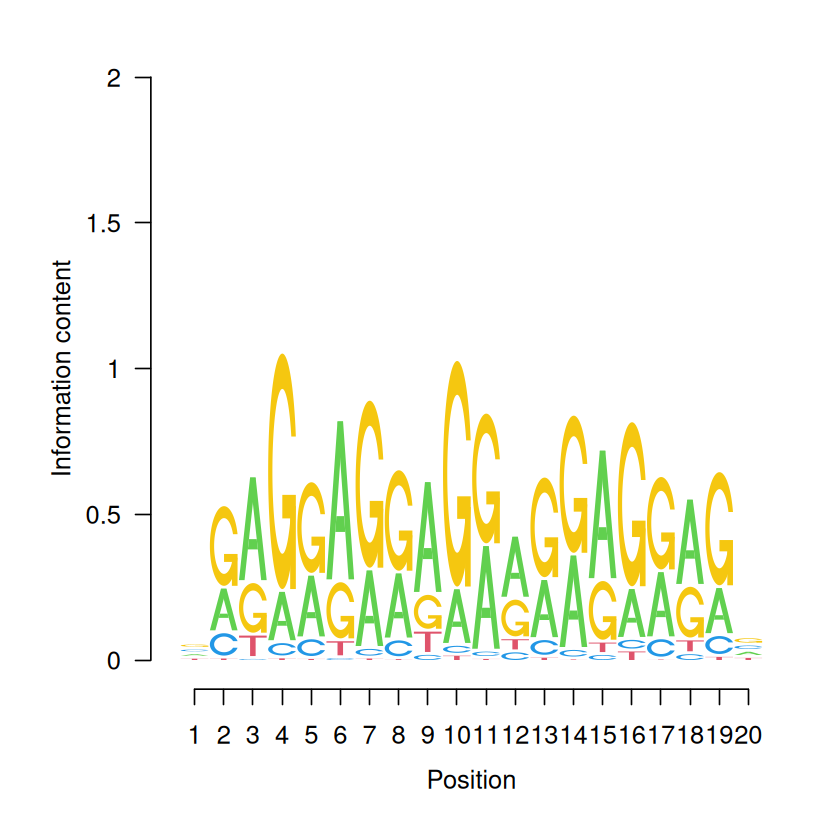

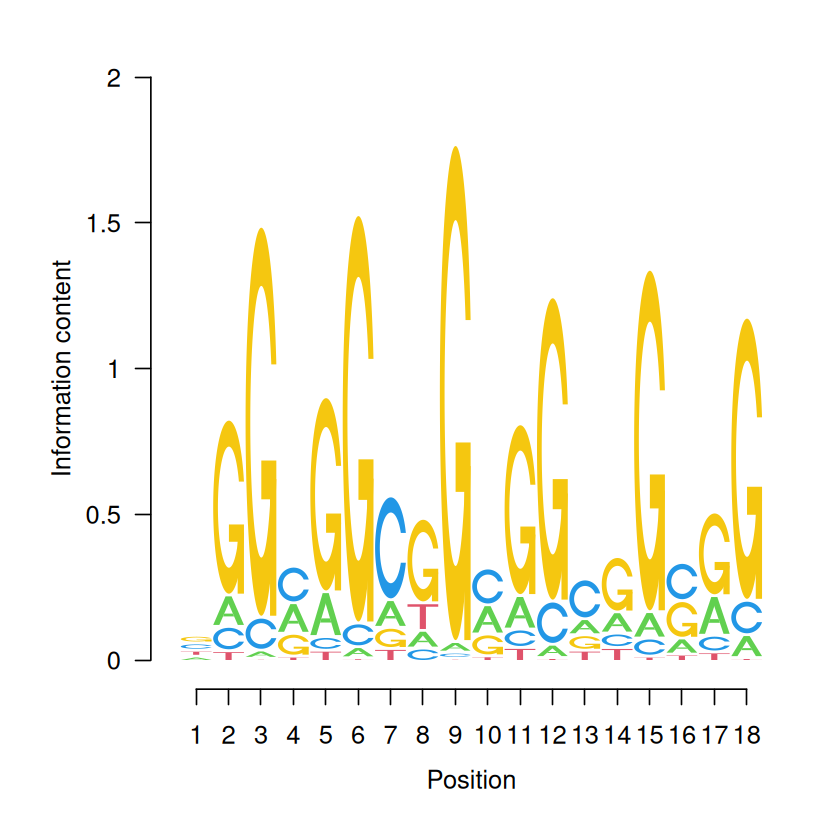

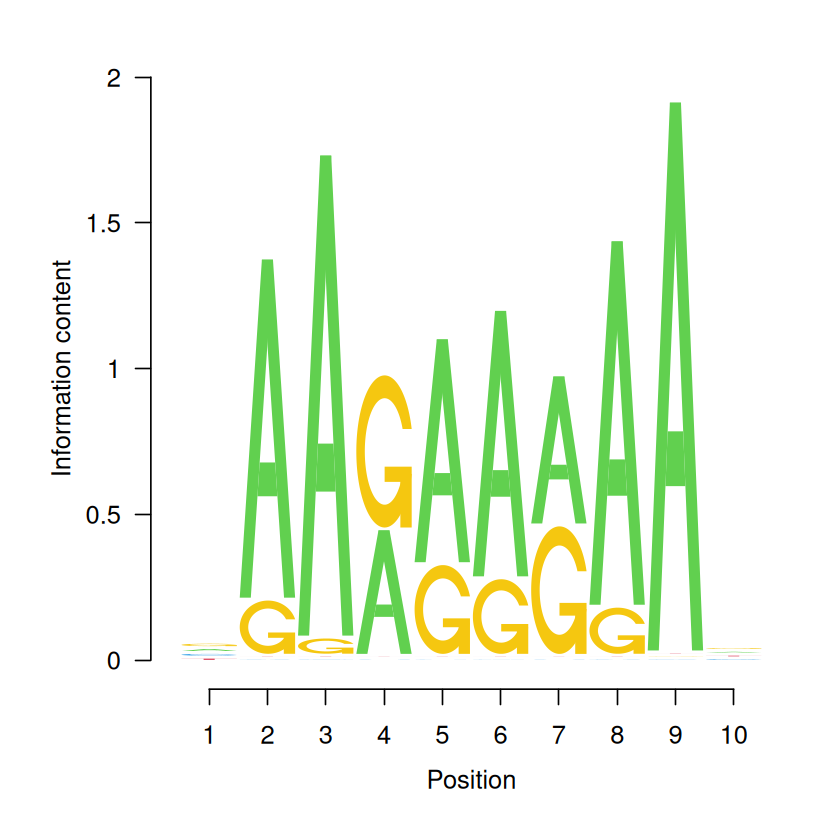

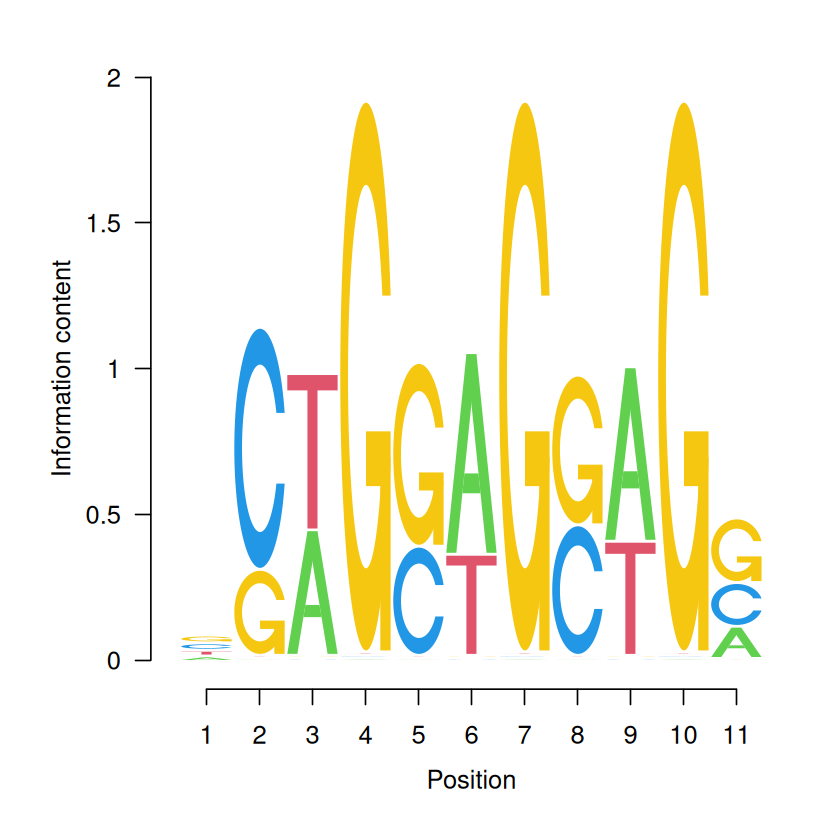

In [15]:
reverse_complement_pwm <- function(pwm) {
  # Reverse the columns (i.e., reverse the motif)
  pwm_rev <- pwm[, ncol(pwm):1]

  # Reorder the rows: A<->T, C<->G
  row_order <- match(c("T", "G", "C", "A"), rownames(pwm_rev))
  pwm_rc <- pwm_rev[row_order, ]
  rownames(pwm_rc) <- c("A", "C", "G", "T")  # restore row names

  return(pwm_rc)
}

seqLogo(pwm_list_down$motif_1)
seqLogo(reverse_complement_pwm(pwm_list_down$motif_2))
seqLogo(pwm_list_down$motif_3)
seqLogo(pwm_list_down$motif_4)
# seqLogo(pwm_list_down$motif_5)

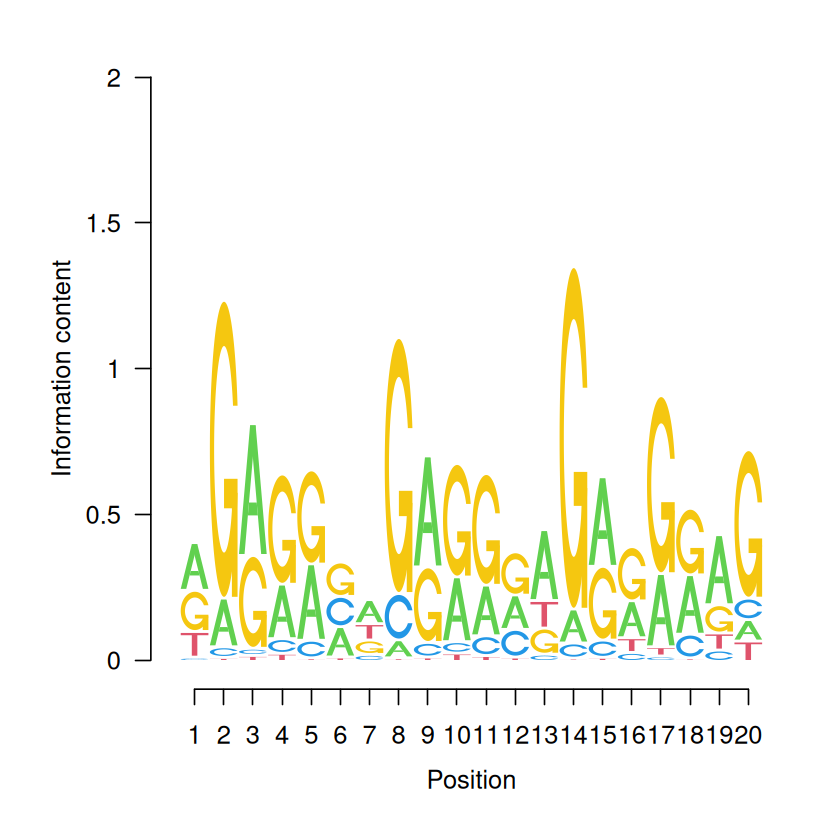

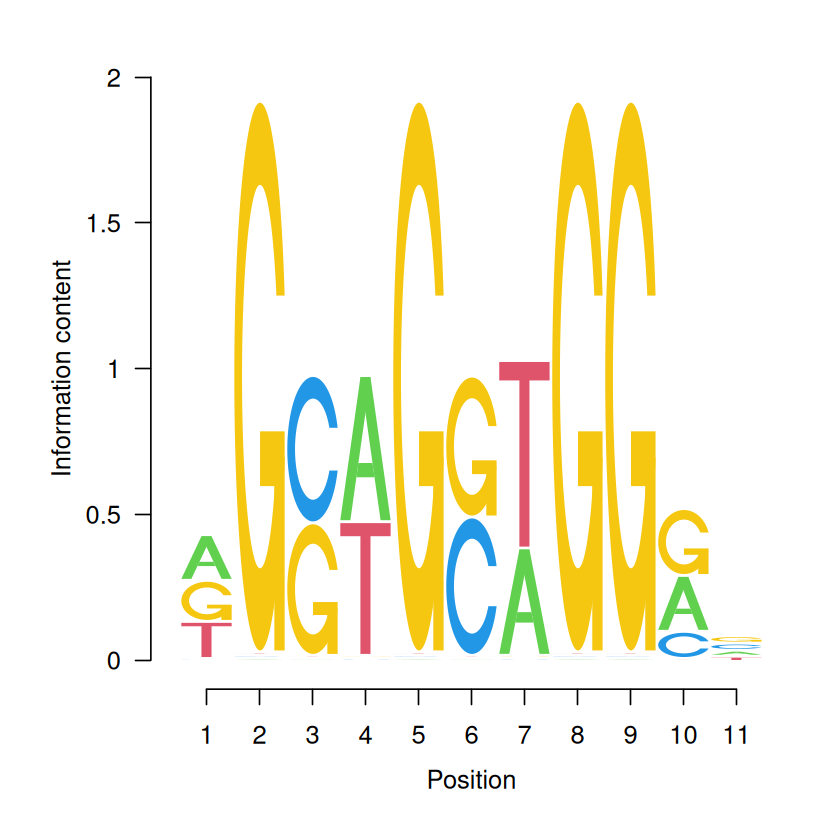

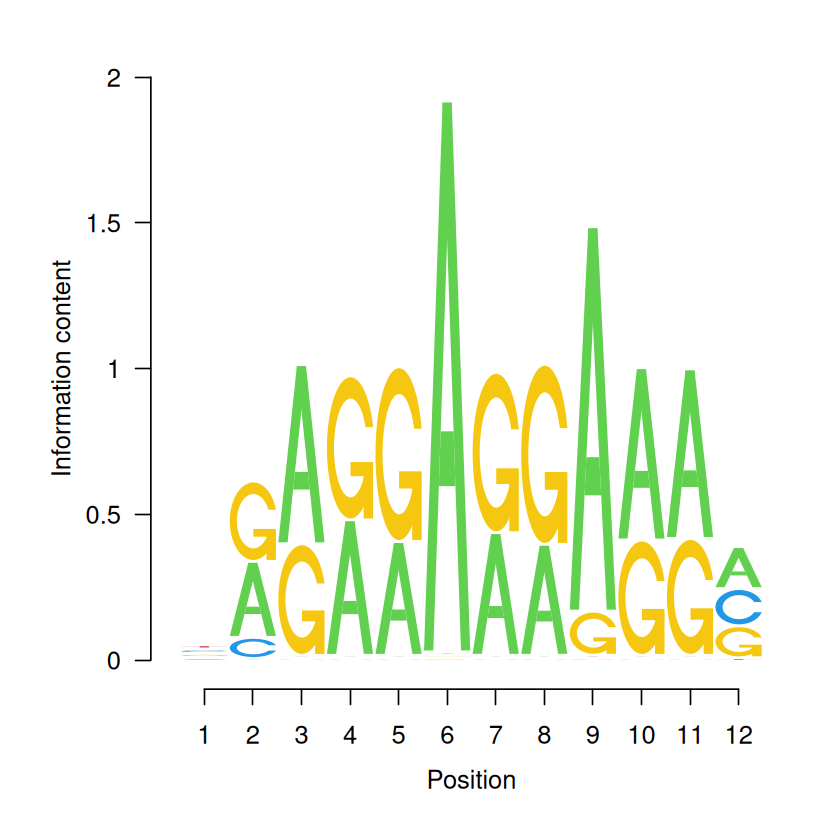

In [20]:
seqLogo(pwm_list_up$motif_1)
seqLogo(reverse_complement_pwm(pwm_list_up$motif_2))
seqLogo(pwm_list_up$motif_3)
# seqLogo(pwm_list_up$motif_4)
# seqLogo(pwm_list_up$motif_5)

In [21]:
print("Similarity between motifs by using the statistics in universalmotif library")

[1] "Similarity between motifs by using the statistics in universalmotif library"


In [22]:
library(universalmotif)

# Function to properly convert PWM to universalmotif object
convert_to_universalmotif <- function(pwm_matrix, motif_name) {
    # Ensure the matrix has proper row names
    if(is.null(rownames(pwm_matrix))) {
        rownames(pwm_matrix) <- c("A", "C", "G", "T")
    }
    
    # Create universalmotif object
    create_motif(pwm_matrix, 
                 name = motif_name, 
                 type = "PWM",
                 alphabet = "DNA")
}

# Convert down-regulated motifs
motifs_down_um <- list()
for(motif_name in names(pwm_list_down)) {
    motifs_down_um[[motif_name]] <- convert_to_universalmotif(pwm_list_down[[motif_name]], 
                                                              paste0("Down_", motif_name))
}

# Convert up-regulated motifs  
motifs_up_um <- list()
for(motif_name in names(pwm_list_up)) {
    motifs_up_um[[motif_name]] <- convert_to_universalmotif(pwm_list_up[[motif_name]], 
                                                            paste0("Up_", motif_name))
}

print(paste("Created", length(motifs_down_um), "down-regulated motifs"))
print(paste("Created", length(motifs_up_um), "up-regulated motifs"))

Warning message in (function (motif, name = "new motif", altname = NA_character_, :
“subscript out of bounds (index 0 >= vector size 0)”
Warning message in (function (motif, name = "new motif", altname = NA_character_, :
“subscript out of bounds (index 0 >= vector size 0)”
Warning message in (function (motif, name = "new motif", altname = NA_character_, :
“subscript out of bounds (index 0 >= vector size 0)”
Warning message in (function (motif, name = "new motif", altname = NA_character_, :
“subscript out of bounds (index 0 >= vector size 0)”
Warning message in (function (motif, name = "new motif", altname = NA_character_, :
“subscript out of bounds (index 0 >= vector size 0)”
Warning message in (function (motif, name = "new motif", altname = NA_character_, :
“subscript out of bounds (index 0 >= vector size 0)”
Warning message in (function (motif, name = "new motif", altname = NA_character_, :
“subscript out of bounds (index 0 >= vector size 0)”
Warning message in (function (motif, name

[1] "Created 4 down-regulated motifs"
[1] "Created 3 up-regulated motifs"


In [23]:
# motifs_down_um
# motifs_up_um

In [24]:
# Combine all motifs for comparison
all_motifs_um <- c(motifs_down_um, motifs_up_um)

# Compare all motifs using different methods
comparison_pcc <- compare_motifs(all_motifs_um, method = "PCC")  # Pearson correlation
comparison_euclidean <- compare_motifs(all_motifs_um, method = "EUCL")  # Euclidean distance
comparison_kl <- compare_motifs(all_motifs_um, method = "KL")  # Kullback-Leibler

print("Pearson Correlation Comparison:")
print(round(comparison_pcc, 3))

[1] "Pearson Correlation Comparison:"
             Down_motif_1 Down_motif_2 Down_motif_3 Down_motif_4 Up_motif_1
Down_motif_1        1.000        0.580        0.800        0.767      0.917
Down_motif_2        0.580        1.000        0.292        0.545      0.609
Down_motif_3        0.800        0.292        1.000        0.355      0.757
Down_motif_4        0.767        0.545        0.355        1.000      0.567
Up_motif_1          0.917        0.609        0.757        0.567      1.000
Up_motif_2          0.661        0.512        0.298        0.896      0.563
Up_motif_3          0.802        0.433        0.845        0.471      0.848
             Up_motif_2 Up_motif_3
Down_motif_1      0.661      0.802
Down_motif_2      0.512      0.433
Down_motif_3      0.298      0.845
Down_motif_4      0.896      0.471
Up_motif_1        0.563      0.848
Up_motif_2        1.000      0.465
Up_motif_3        0.465      1.000


In [25]:
# Get indices for down and up motifs
num_down <- length(motifs_down_um)
num_up <- length(motifs_up_um)

# Extract cross-comparison (down vs up only)
down_vs_up_comparison <- comparison_pcc[1:num_down, (num_down + 1):(num_down + num_up)]

print("\nDown vs Up Motif Similarity Matrix:")
print(round(down_vs_up_comparison, 3))

# Set proper row and column names
rownames(down_vs_up_comparison) <- names(motifs_down_um)
colnames(down_vs_up_comparison) <- names(motifs_up_um)

[1] "\nDown vs Up Motif Similarity Matrix:"
             Up_motif_1 Up_motif_2 Up_motif_3
Down_motif_1      0.917      0.661      0.802
Down_motif_2      0.609      0.512      0.433
Down_motif_3      0.757      0.298      0.845
Down_motif_4      0.567      0.896      0.471


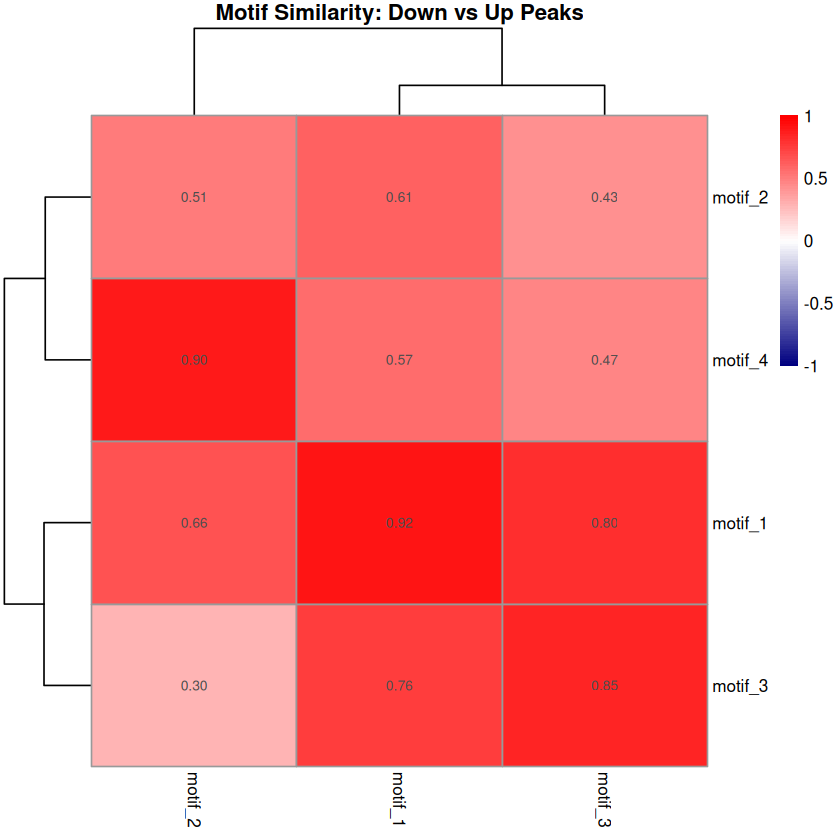

In [26]:
library(pheatmap)
library(RColorBrewer)

# Create heatmap
pheatmap(down_vs_up_comparison,
         main = "Motif Similarity: Down vs Up Peaks",
         color = colorRampPalette(c("navy", "white", "red"))(100),
         cluster_rows = TRUE,
         cluster_cols = TRUE,
         display_numbers = TRUE,
         number_format = "%.2f",
         fontsize_number = 8,
         breaks = seq(-1, 1, length.out = 101))

In [27]:
# Convert matrix to data frame for easier analysis
similarity_df <- expand.grid(Down_Motif = rownames(down_vs_up_comparison),
                            Up_Motif = colnames(down_vs_up_comparison),
                            stringsAsFactors = FALSE)

similarity_df$Similarity <- as.vector(down_vs_up_comparison)

# Sort by similarity
similarity_df <- similarity_df[order(similarity_df$Similarity, decreasing = TRUE), ]

print("Top 10 most similar motif pairs between conditions:")
print(head(similarity_df, 10))

print("\nTop 5 least similar motif pairs:")
print(tail(similarity_df, 5))

[1] "Top 10 most similar motif pairs between conditions:"
   Down_Motif Up_Motif Similarity
1     motif_1  motif_1  0.9172387
8     motif_4  motif_2  0.8964693
11    motif_3  motif_3  0.8452092
9     motif_1  motif_3  0.8023667
3     motif_3  motif_1  0.7571989
5     motif_1  motif_2  0.6611399
2     motif_2  motif_1  0.6087554
4     motif_4  motif_1  0.5665714
6     motif_2  motif_2  0.5123077
12    motif_4  motif_3  0.4714995
[1] "\nTop 5 least similar motif pairs:"
   Down_Motif Up_Motif Similarity
4     motif_4  motif_1  0.5665714
6     motif_2  motif_2  0.5123077
12    motif_4  motif_3  0.4714995
10    motif_2  motif_3  0.4325929
7     motif_3  motif_2  0.2983437


In [28]:
# Calculate summary statistics
summary_stats <- data.frame(
    Metric = c("Mean Similarity", "Max Similarity", "Min Similarity", 
               "Std Dev", "Pairs > 0.5", "Pairs > 0.7"),
    Value = c(
        round(mean(similarity_df$Similarity), 3),
        round(max(similarity_df$Similarity), 3),
        round(min(similarity_df$Similarity), 3),
        round(sd(similarity_df$Similarity), 3),
        sum(similarity_df$Similarity > 0.5),
        sum(similarity_df$Similarity > 0.7)
    )
)

print("Similarity Summary Statistics:")
print(summary_stats)

[1] "Similarity Summary Statistics:"
           Metric Value
1 Mean Similarity 0.647
2  Max Similarity 0.917
3  Min Similarity 0.298
4         Std Dev 0.199
5     Pairs > 0.5 9.000
6     Pairs > 0.7 5.000


In [29]:
print("Similarity between motifs by using the statistics in motifstack library")

[1] "Similarity between motifs by using the statistics in motifstack library"


In [30]:

# Pearson Correlation of two PWMs (allow alignment)
pwm_similarity <- function(pwm1, pwm2) {
  min_len <- min(ncol(pwm1), ncol(pwm2))
  pwm1_trim <- pwm1[, 1:min_len]
  pwm2_trim <- pwm2[, 1:min_len]

  # Flatten the matrices into vectors and correlate
  cor(as.vector(pwm1_trim), as.vector(pwm2_trim))
}

In [31]:
# Create an empty matrix to store pairwise similarities
similarity_matrix <- matrix(NA, 
                            nrow = length(pwm_list_up), 
                            ncol = length(pwm_list_down),
                            dimnames = list(names(pwm_list_up), names(pwm_list_down)))

# Fill in the matrix
for (i in names(pwm_list_up)) {
  for (j in names(pwm_list_down)) {
    pwm_up <- pwm_list_up[[i]]
    pwm_down <- reverse_complement_pwm(pwm_list_down[[j]])  # reverse-complement down motifs
    similarity_matrix[i, j] <- pwm_similarity(pwm_up, pwm_down)
  }
}

# View matrix
print(round(similarity_matrix, 3))


        motif_1 motif_2 motif_3 motif_4
motif_1  -0.643   0.500  -0.582  -0.158
motif_2   0.272   0.155   0.145  -0.084
motif_3  -0.709   0.128  -0.596  -0.083


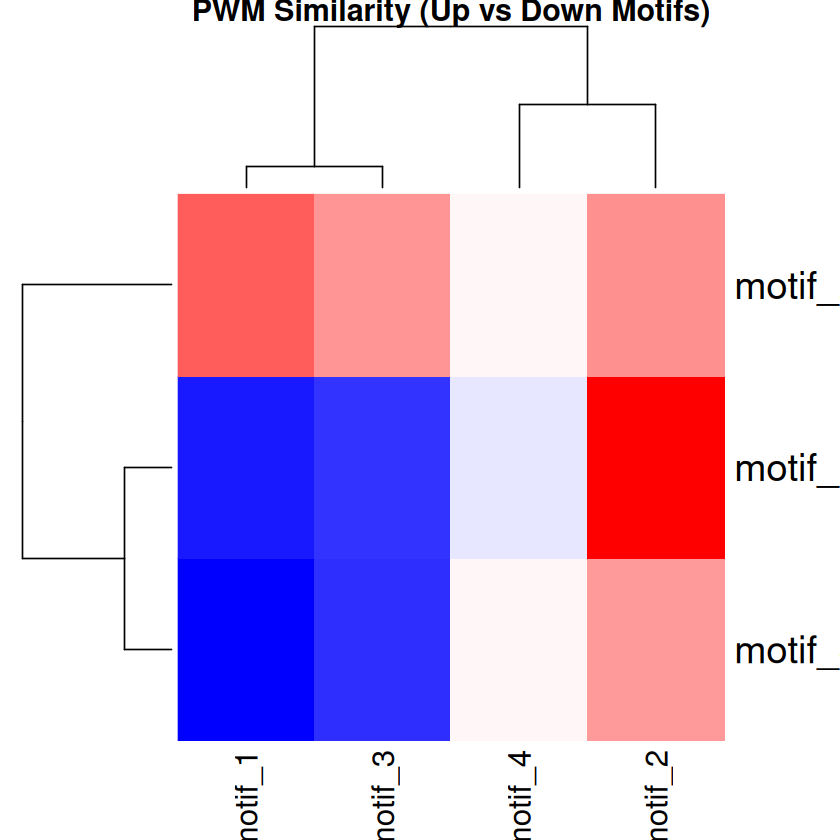

In [32]:
heatmap(similarity_matrix, 
        main = "PWM Similarity (Up vs Down Motifs)", 
        col = colorRampPalette(c("blue", "white", "red"))(100), 
        scale = "none")
